In [1]:
import sys
sys.path.append('../..')
import pickle
# add multipoles package path

from multipoles import MultipoleControl
from plottingfuncns import *

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import os
#module_path = os.path.dirname(os.path.abspath(__file__))
module_path = os.path.abspath('')

######## example of writing pickle file ###################
#THIS REQUIRES the bem package- I can only get it to run if I use
#the conda environment set up for bem (python 3.6... see bem repo for setup).
#Also please amend line 5 of the 'helper_functions' code so that it points to
#your bem location

#The rest of the code should work with any version of python3 (I'm using 3.7).
# You do have to install cvx/cvxpy (for ex, using pip)

# #fin = the vtk file extension that will be used to read in vtk files
# from helper_functions import *
#
# #these contain the field simulations for each electrode
# fin = "./vtks/htrapF_mega_short0.002_size100.0"
#
# #strs are the string names of your DC electrodes
# strs = "DC1 DC2 DC3 DC4 DC5 DC6 DC7 DC8 DC9 DC10 DC11 DC12 DC13 DC14 DC15 DC16 DC17 DC18 DC19 DC20 DC21".split()
#
# #this is the grid that gives the locations of the simulated potentials in the example
# pathgrid = './gridExample.pkl'
#
# #fout is the name of the output pickle file that you will write to
# fout = "htrap_example"
#
# #load in the example grid
# fgrid = open(pathgrid, 'rb')
# grid = pickle.load(fgrid)
#
# #use the write pickle function in the 'helper_functions' library to read trap solutions,
# #format them so that they can be read into Sara's/Shuqi's code, and save them to an
# #output pickle file.
# write_pickle(fin,fout,grid,strs)

######## end of pickle writing code #########################

######## beginning of multipole expansion code ##############

In [2]:
###### loading in pickle file ###############################
# import data, and define parameters
path = module_path+'/htrap_simulation_1_el3.5.pkl'
f = open(path, 'rb')
trap = pickle.load(f)
#############################################################

In [3]:

###### setting up multipole expansion @ trap location #######
#xl, yl, zl define the origin at which we will do the multipole expansion
#i.e. they define where you want to trap

#strs are the string names of your DC electrodes (copy from loading pickle,
#I wrote it a second time so that the code runs in case you comment out that code)
strs = "DC1 DC2 DC3 DC4 DC5 DC6 DC7 DC8 DC9 DC10 DC11 DC12 DC13 DC14 DC15 DC16 DC17 DC18 DC19 DC20 DC21".split()
zl = 3.1*72*1e-3
xl = -0.051*72*1e-3
yl = 1.06*72*1e-3

position = [xl, yl, zl]

#ROI = 'range of interest', I believe
#It defines the volume region over which multipole expansion will be performed.
#nROI is the number of points that make up the dimensions of the volume of the ROI
#I believe it ends up being the indices of the 3-d array that you index so it is dimensionless
nROI = 5
roi = [nROI, nROI, nROI]
order = 2

#controlled electrodes- this will define which electrodes will be used to control your trap
controlled_electrodes = []

#new from shuqi's code- 'excl' defines a dictionary of excluded electrodes
#the dictionary index (left of colon) is the electrode you want to exclude
#its value (right of colon) defines what you want to set it to
#if you set it to "gnd" it will always set the voltage of that DC to 0
#if you set it to "DCx" it will always set the voltage of that DC to be the same as DCx
#this is in case you have trap shorts, if you don't need it just don't include the indices

In [4]:
excl = {
    # "DC6": "gnd",
    #     "DC4": "gnd",
    #     "DC5": "gnd",
    #     "DC8": "gnd",
    #     "DC14": "DC13",
    #     "DC11": "gnd",
    #     "DC12": "gnd"
}

#build the controlled electrodes list, given the constraints of the 'excl' list
for electrode in strs:
    if electrode in excl and excl[electrode] != "gnd":
        trap['electrodes'][excl[electrode]]["potential"] = trap['electrodes'][excl[electrode]]["potential"] + \
                                                           trap['electrodes'][electrode]["potential"]
    elif electrode not in excl:
        controlled_electrodes.append(electrode)


#which multipoles you want to include in multipole calculations
used_order1multipoles = ['Ex', 'Ey', 'Ez']
used_order2multipoles = ['U1', 'U2', 'U3','U4','U5']
used_multipoles = used_order1multipoles + used_order2multipoles
print(used_multipoles)


# create MultipoleControl object
s = MultipoleControl(trap, position, roi, controlled_electrodes, used_multipoles, order)
###############################################################

################# writing to cfile ############################
#write solution text file (cfile, sqip uses .txt format tho)
#this will be generated in the 'Electrodes' directory
s.write_txt(module_path+'/el3.5_4-5-6-8-11-12-gnd_13-14(feb2022_noU4)', strs, excl)
###############################################################


########## various plots of the expansion fields ##############
### TO DO: comments, checking multipoles generated, add RF electrode
# code to the bottom

print('Multipole names:', s.multipole_names)
print('Normalization factors:', s.normalization_factors)

['Ex', 'Ey', 'Ez', 'U1', 'U2', 'U3', 'U4', 'U5']
(168,)
Multipole names: ['C', 'Ey', 'Ez', 'Ex', 'U3', 'U4', 'U2', 'U5', 'U1']
Normalization factors: [0.28209479 0.48860251 0.48860251 0.48860251 1.09254843 1.09254843
 0.63078313 1.09254843 0.54627422]


[ 37.  39.  41.  43.  45.  47.  49.  51.  53.  55.  57.  59.  61.  63.
  65.  67.  69.  71.  73.  75.  77.  79.  81.  83.  85.  87.  89.  91.
  93.  95.  97.  99. 101. 103. 105. 107. 109. 111. 113. 115. 117. 119.
 121. 123. 125.]


/Users/hewenhao/Desktop/haeffner/trap-sim-tools-python/Electrodes/examples/0430/../../plottingfuncns.py:98: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(s.controlled_elecs, rotation=45, fontsize=12)


['DC1', 'DC2', 'DC3', 'DC4', 'DC5', 'DC6', 'DC7', 'DC8', 'DC9', 'DC10', 'DC11', 'DC12', 'DC13', 'DC14', 'DC15', 'DC16', 'DC17', 'DC18', 'DC19', 'DC20', 'DC21']


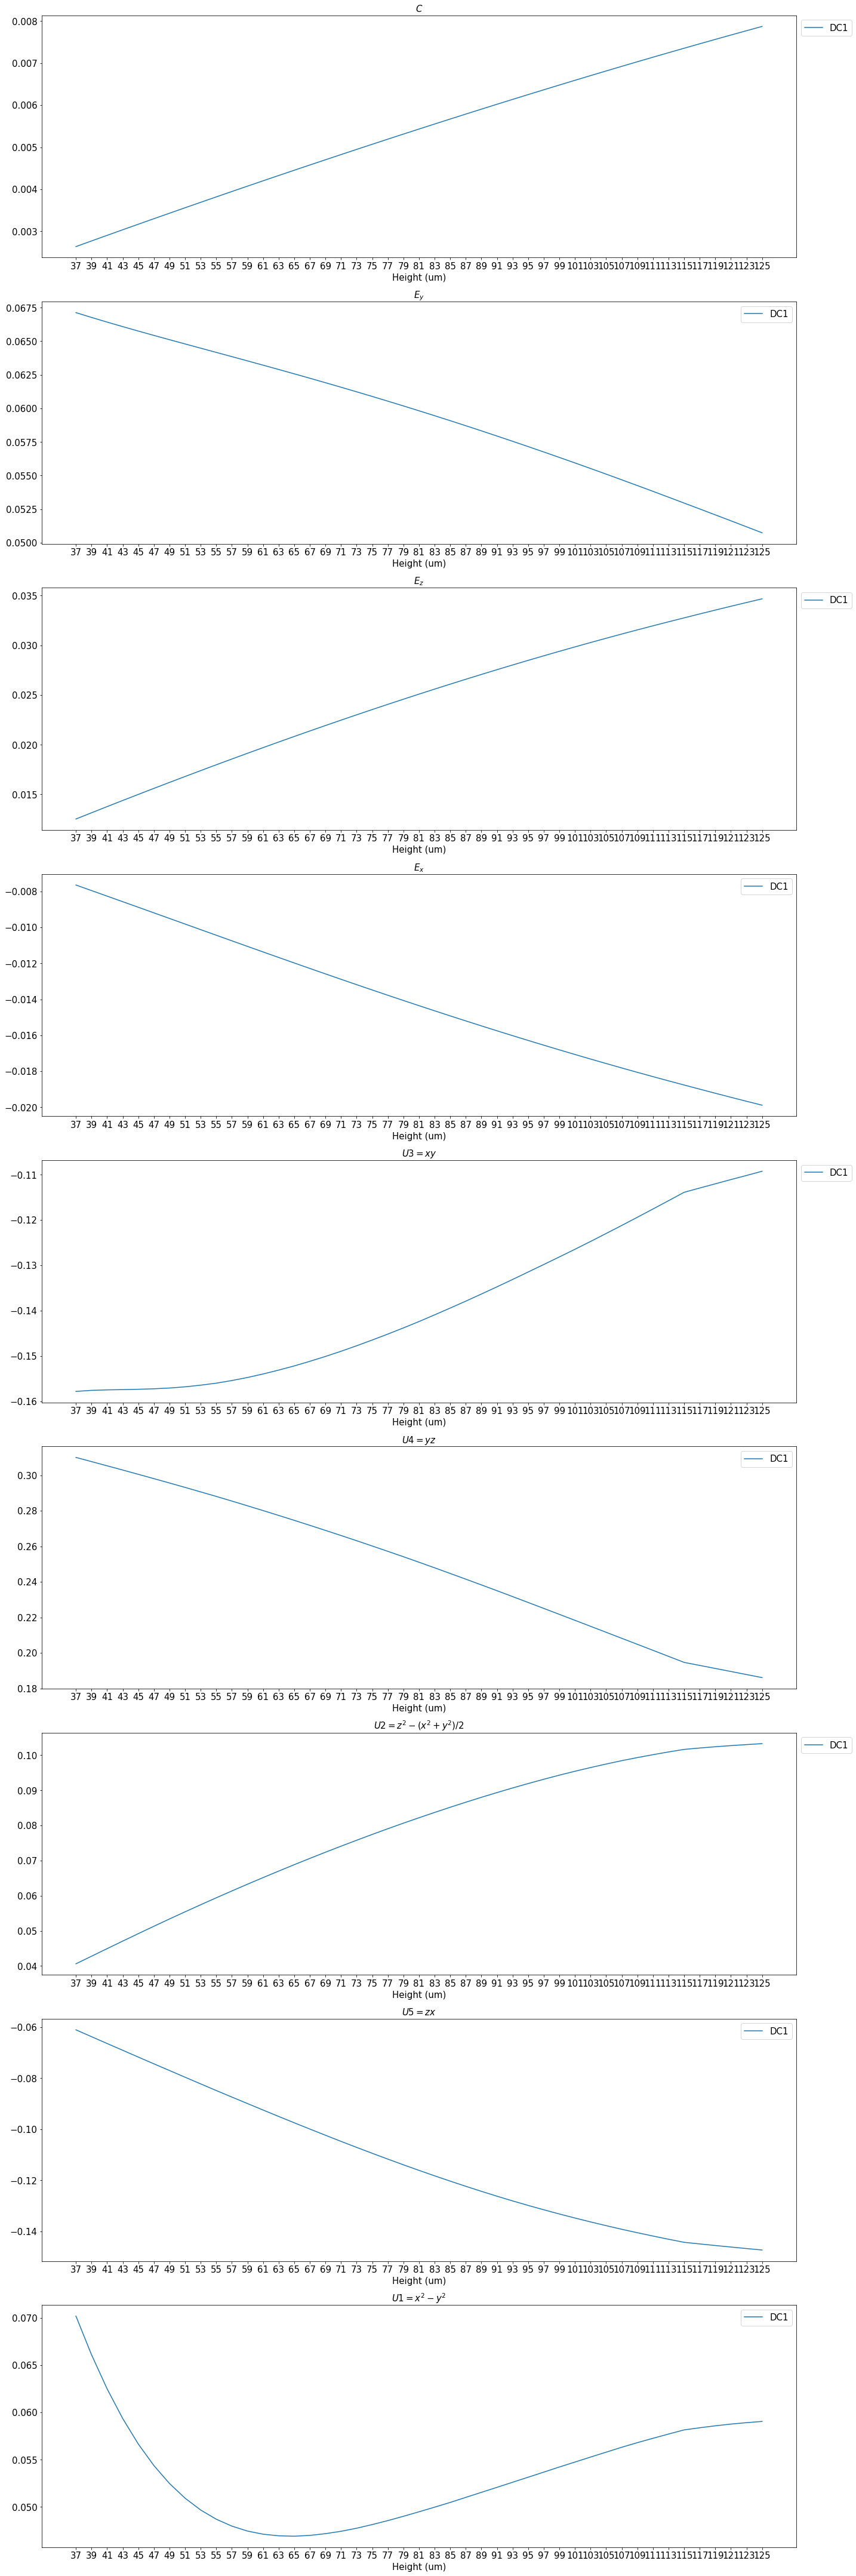

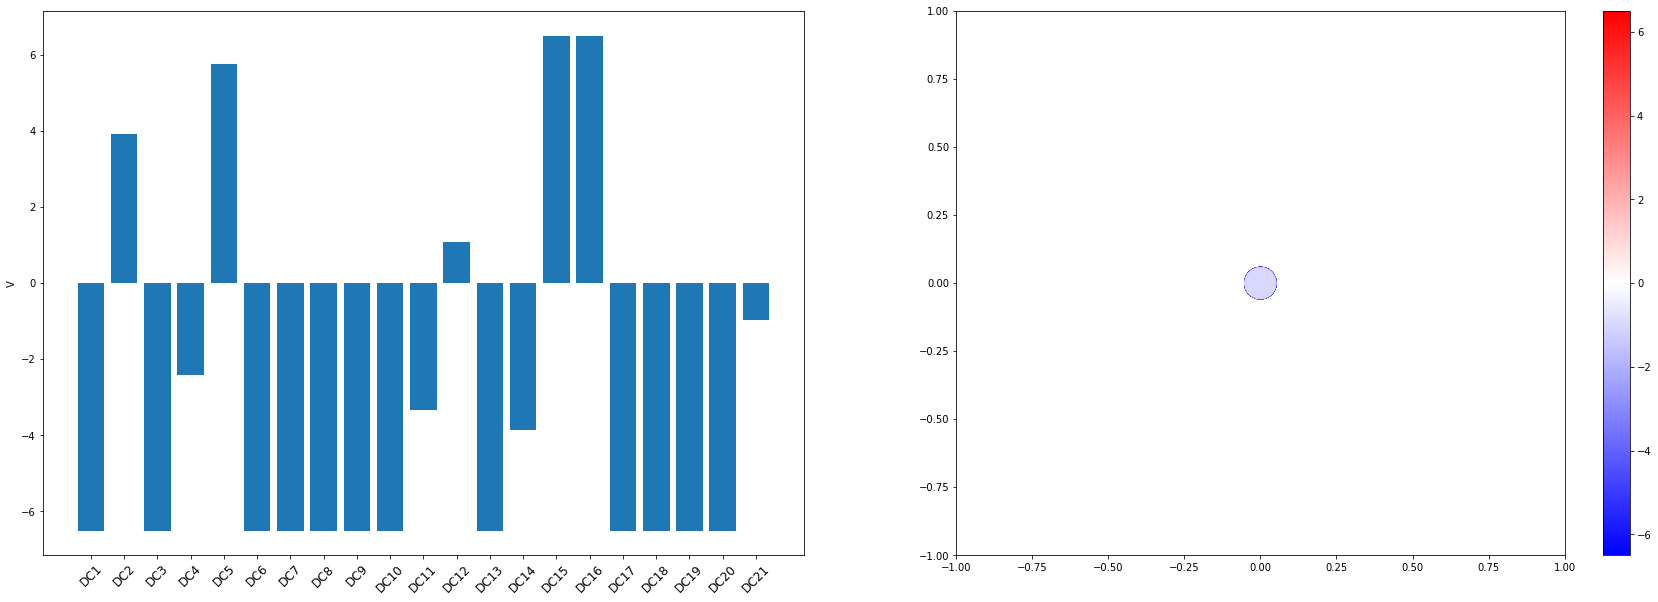

/var/folders/5m/rhf_xw8938df96n0qywsvnlh0000gn/T/ipykernel_32033/1996536559.py:49: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Coeffs_temp = pd.Series()
/var/folders/5m/rhf_xw8938df96n0qywsvnlh0000gn/T/ipykernel_32033/1996536559.py:49: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Coeffs_temp = pd.Series()
/var/folders/5m/rhf_xw8938df96n0qywsvnlh0000gn/T/ipykernel_32033/1996536559.py:49: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Coeffs_temp = pd.Series()
/var/folders/5m/rhf_xw8938df96n0qywsvnlh0000gn/T/ipykernel_32033/1996536559.py:49: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future v

-0.00048586822335994206


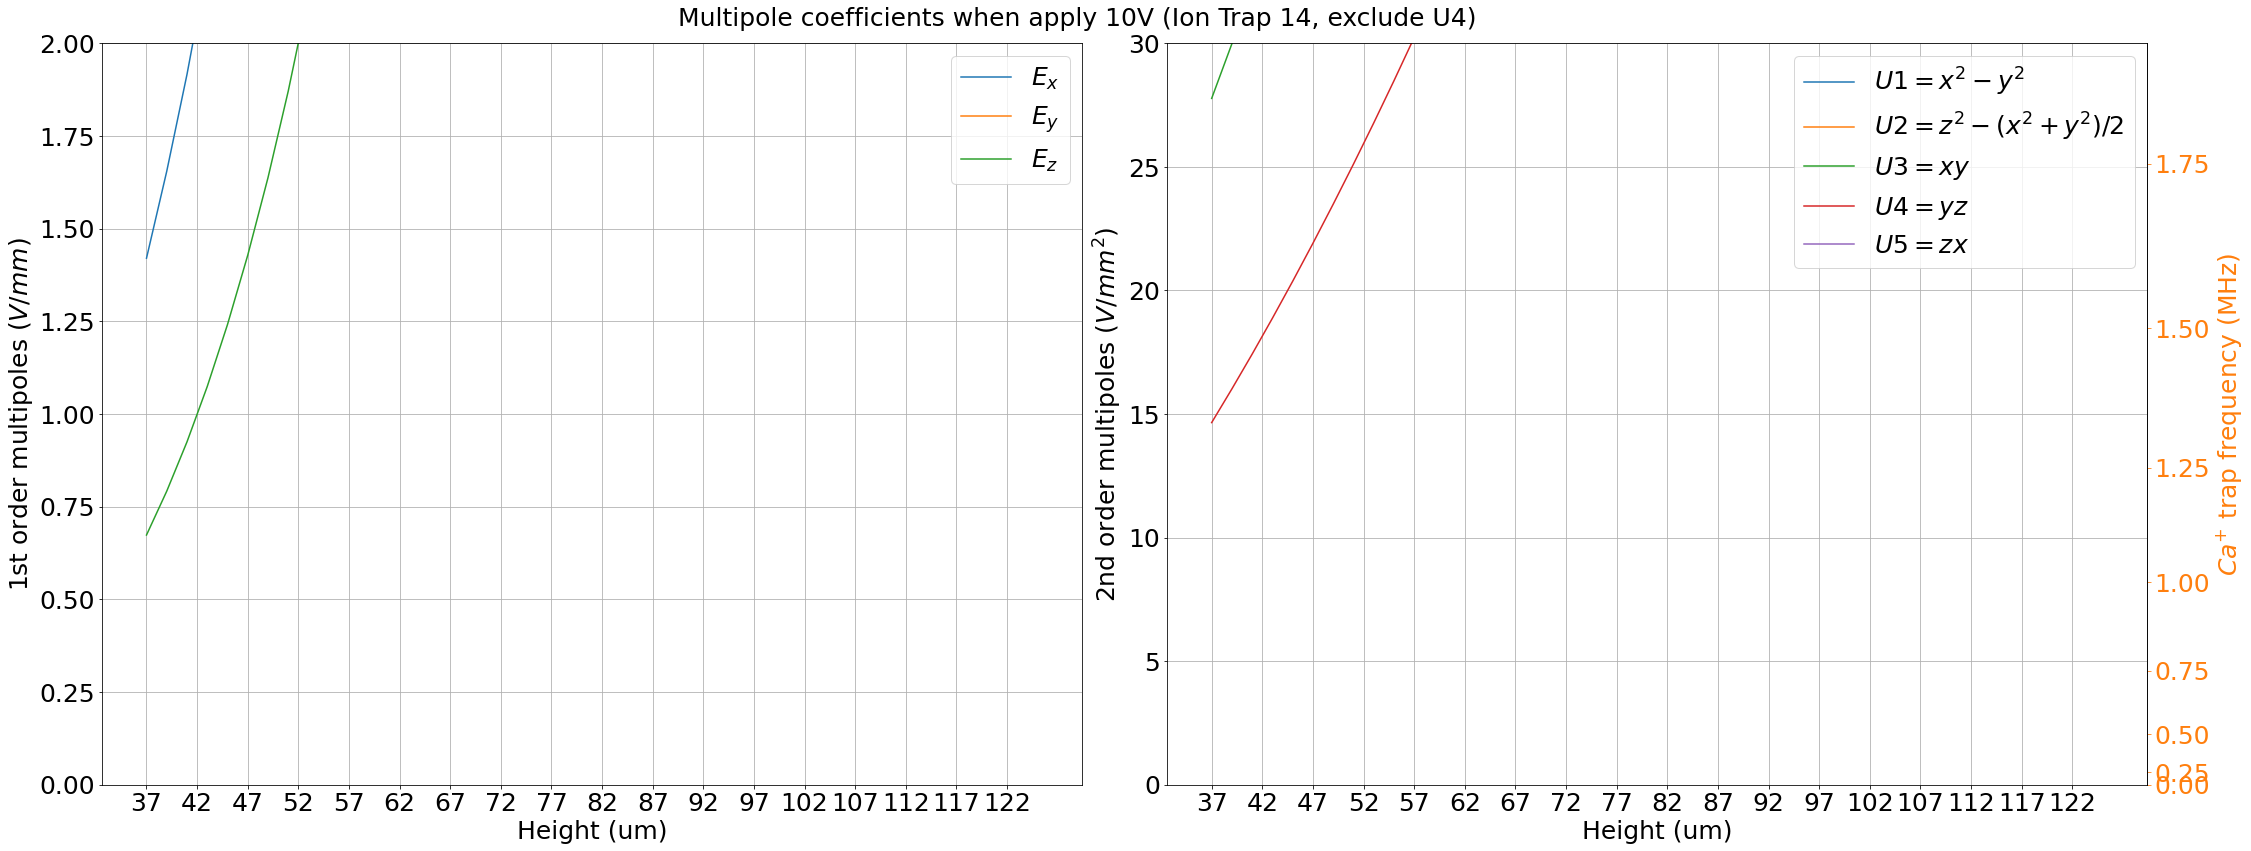

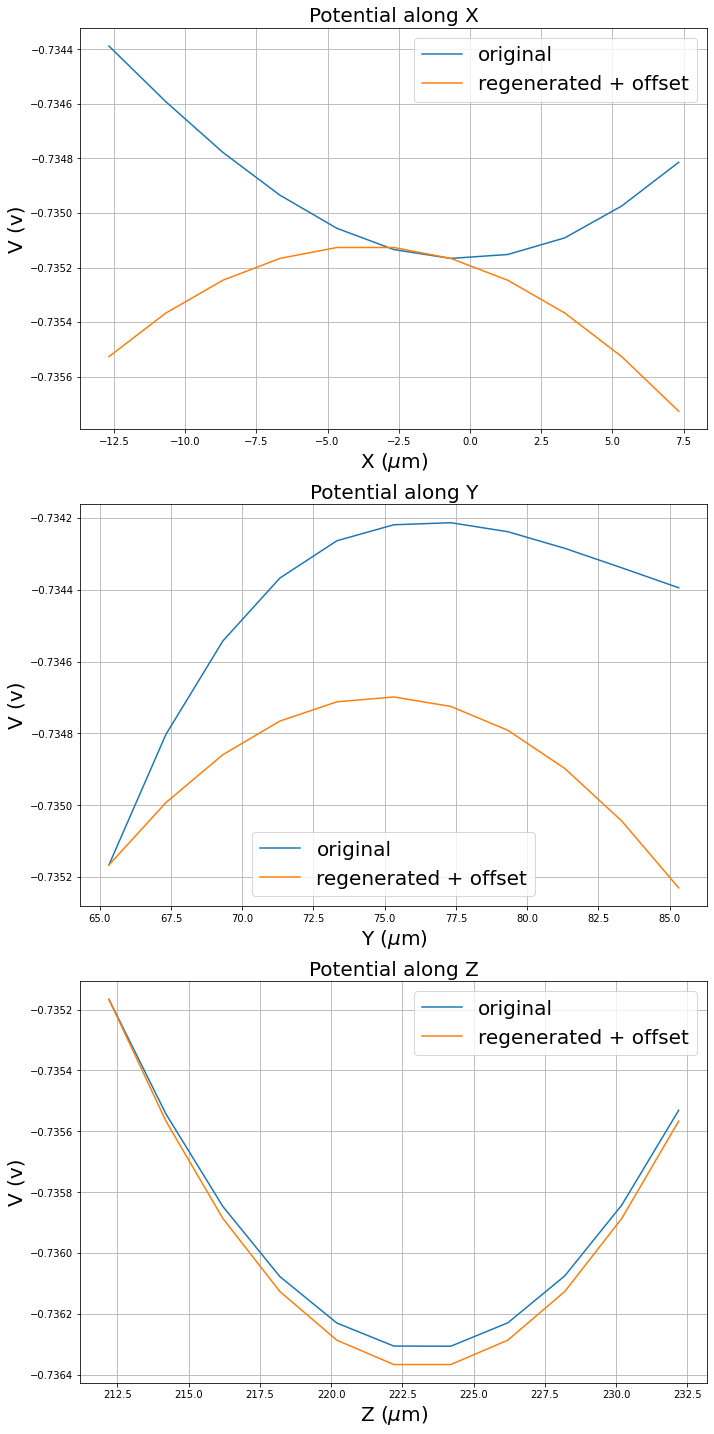

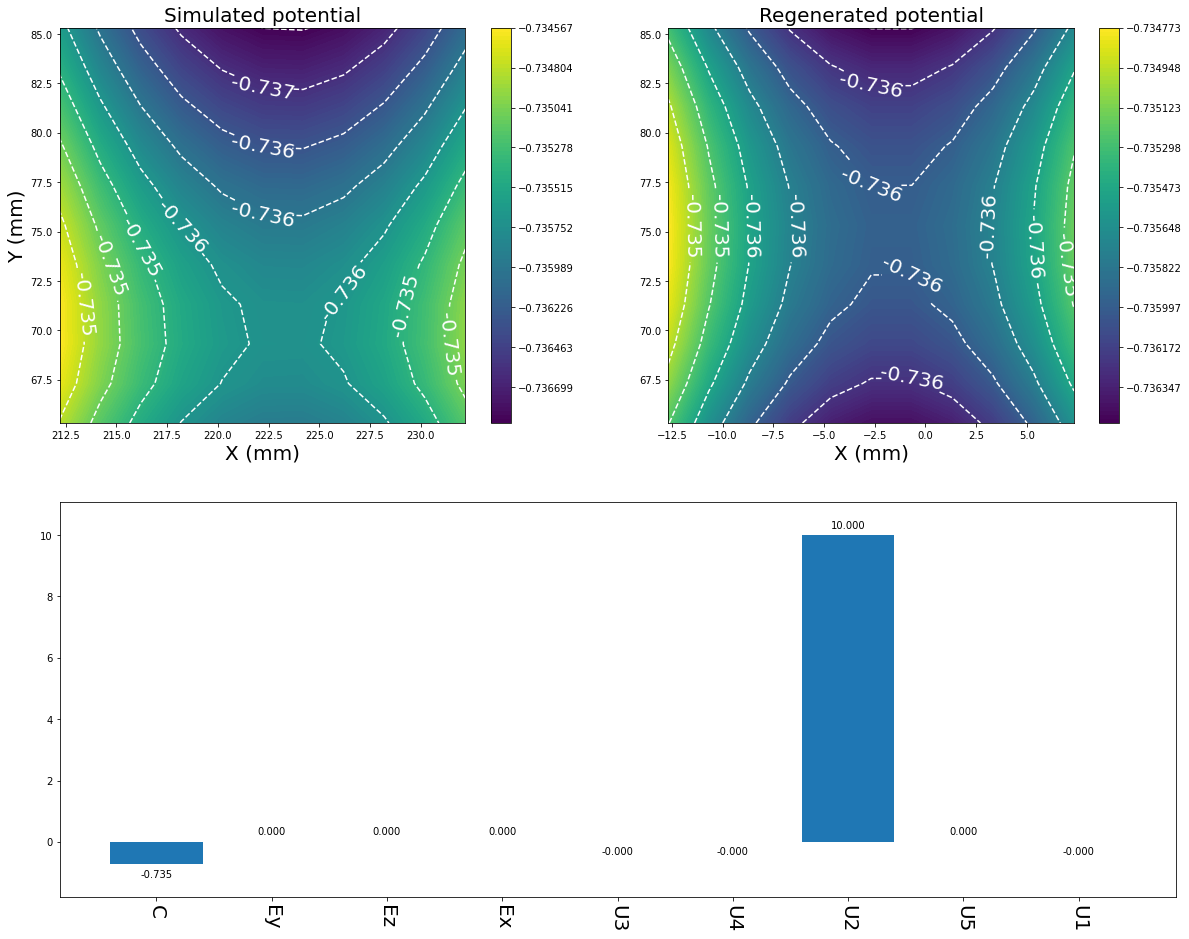

In [5]:
v1 = pd.Series(np.zeros(len(controlled_electrodes)), index=controlled_electrodes)
vs = []
for ele in s.electrode_names:
    v = v1.copy()
    v[ele] = 1
    vs.append(v)

# plot_multipole_vs_expansion_height(5)
# plot multipole coefficients vs different heights for each electrode

height_list = np.round(trap['Y'][nROI:] * 1e3)
numMUltipoles = len(s.multipole_print_names)
ne = len(s.electrode_names)
multipoles_vs_height = np.zeros((len(height_list), numMUltipoles, ne))
print(height_list)
for i, height in enumerate(height_list):
    position1 = [xl, height * 1e-3, zl]
    s.update_origin_roi(position1, roi)
    multipoles_vs_height[i] = np.asarray(s.multipole_expansion.loc[s.multipole_names])

size = 15
fig, ax = plt.subplots(numMUltipoles, 1, figsize=(20, 60))

for i, mul in enumerate(s.multipole_print_names):
    for j, ele in enumerate(s.electrode_names[0:1]):
        ax[i].plot(height_list, multipoles_vs_height[:, i, j], label=ele)
        ax[i].set_title(mul, fontsize=size)
        ax[i].set_xticks(height_list)
        #         ax[i].set_xlim(left=50, right=100)
        ax[i].tick_params(labelsize=size)
        ax[i].set_xlabel('Height (um)', fontsize=size)
    update_colors(ax[i])
    ax[i].legend(fontsize=size, bbox_to_anchor=(1, 1))

fig.canvas.draw()
fig.tight_layout(pad=1)

plot_muls(s,xl,zl,roi,height= 75, ez=0, ex=0, ey=0,u2=10, u5=0, u1=0, u3=0)
# %% md
# plot coefficients can be achieved for each multipole (controlled individually) when apply max 40 volts
# %%
height_list = np.round(trap['Y'][nROI:] * 1e3)
numMUltipoles = len(used_multipoles)
Coeffs = pd.DataFrame()
for height in height_list:
    position1 = [xl, height * 1e-3, zl]
    s.update_origin_roi(position1, roi)

    Coeffs_temp = pd.Series()
    for key in used_multipoles:
        multipole_coeffs = pd.Series(np.zeros(len(used_multipoles)), index=used_multipoles)
        multipole_coeffs[key] = 1
        voltages = s.setMultipoles(multipole_coeffs)
        max_v = np.max(abs(voltages))
        Coeffs_temp[key] = 40 / max_v

    Coeffs[height] = Coeffs_temp

size = 25
# plt.rc('xtick', labelsize=size)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=size)    # fontsize of the tick labels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 12))
for mul in used_order1multipoles:
    ax1.plot(height_list, Coeffs.loc[mul], label=s.multipole_print_names[mul])
ax1.set_ylabel(r'1st order multipoles $(V/mm)$', fontsize=size)
ax1.set_xticks(np.arange(height_list[0], height_list[-1] + 1, 5))
ax1.set_xlabel('Height (um)', fontsize=size)
ax1.tick_params(labelsize=size)
ax1.legend(fontsize=size)

ax1.set_ylim(0, 2)  # set ylim

ax1.grid(True)

for mul in used_order2multipoles:
    ax2.plot(height_list, Coeffs.loc[mul], label=s.multipole_print_names[mul])
ax2.set_ylabel(r'2nd order multipoles $(V/mm^2)$', fontsize=size)
ax2.set_xticks(np.arange(height_list[0], height_list[-1] + 1, 5))
ax2.set_xlabel('Height (um)', fontsize=size)

ax2.set_ylim(0, 30)  # set ylim




ax2.tick_params(labelsize=size)
ax2.legend(fontsize=size)
ax2.grid(True)
fig.suptitle('Multipole coefficients when apply 10V (Ion Trap 14, exclude U4)', fontsize=size)
fig.tight_layout(pad=1)

secax = ax2.secondary_yaxis('right', functions=(U2_to_mhz, mhz_to_U2))
secax.tick_params(labelsize=size, colors='#ff7f0e')
secax.set_ylabel('$Ca^{+}$ trap frequency (MHz)', fontsize=size, color='#ff7f0e')

# plt.savefig('Multipole_coeffs_20v_rfbias.jpg', format = 'jpg', dpi = 300)

plot_1d(s,xl,zl,roi,height=75, ez=0, ex=0, ey=0, u2=10,u5=0, u1=0, u3=0)
# %%
outarray = []


plot_U2(s,xl,zl,roi,height=75, ez=0, ex=0, ey=0, u2=10, u5=0, u1=0, u3=0)
# output = interactive_plot.children[-1]
# output.layout.height = '1000px'